# 4.4 모델 구현, 학습 및 결과 확인

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)   # shape(num_data, 1) 크기로 표준편차 노이즈 1
x = init.uniform_(torch.Tensor(num_data, 1), -15,15)          # uniform(균등)하게 -15~15까지의 숫자 랜덤하게 넣기
y = (x**2) + 3
y_noise = y + noise

model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1),
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()   # 이 한 줄로 각 변수별 기울기를 모두 계산
    optimizer.step()

    loss_array.append(loss.detach().numpy())  # tensor 형태라 matplotlib에서 시각화를 못하므로 numpy 자료형으로 변환

In [32]:
type(loss_array)

list

In [33]:
type(loss_array[0])

numpy.ndarray

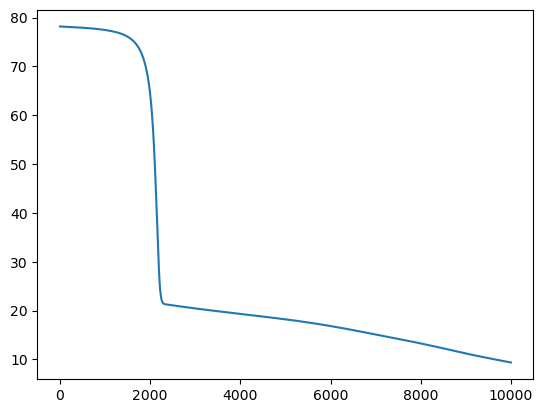

In [34]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()